## W to GeoGraph Migration Guide

Author: [Serge Rey](http://github.com/sjsrey)

### Introduction

- what are Weights
- motivation for the GeoGraph
- history
- purpose and roadmap

### Imports

In [56]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from libpysal.io import open as psopen
from libpysal import weights
from libpysal import graph

In [57]:
from libpysal import examples

In [12]:
dbs = examples.available()

In [15]:
examples.explain('sids2')

sids2
=====

North Carolina county SIDS death counts and rates
-------------------------------------------------

* sids2.dbf: attribute data. (k=18)
* sids2.html: metadata.
* sids2.shp: Polygon shapefile. (n=100)
* sids2.shx: spatial index.
* sids2.gal: spatial weights in GAL format.

Source: Cressie, Noel (1993). Statistics for Spatial Data. New York, Wiley, pp. 386-389. Rates computed.
Updated URL: https://geodacenter.github.io/data-and-lab/sids2/



In [29]:
# Read the file in
gdf = gpd.read_file(examples.get_path('sids2.shp'))
   
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AREA       100 non-null    float64 
 1   PERIMETER  100 non-null    float64 
 2   CNTY_      100 non-null    int64   
 3   CNTY_ID    100 non-null    int64   
 4   NAME       100 non-null    object  
 5   FIPS       100 non-null    object  
 6   FIPSNO     100 non-null    int64   
 7   CRESS_ID   100 non-null    int64   
 8   BIR74      100 non-null    float64 
 9   SID74      100 non-null    float64 
 10  NWBIR74    100 non-null    float64 
 11  BIR79      100 non-null    float64 
 12  SID79      100 non-null    float64 
 13  NWBIR79    100 non-null    float64 
 14  SIDR74     100 non-null    float64 
 15  SIDR79     100 non-null    float64 
 16  NWR74      100 non-null    float64 
 17  NWR79      100 non-null    float64 
 18  geometry   100 non-null    geometry
dtypes: float64(12), geomet

In [30]:
gdf.geometry

0     POLYGON ((-81.47276 36.23436, -81.54084 36.272...
1     POLYGON ((-81.23989 36.36536, -81.24069 36.379...
2     POLYGON ((-80.45634 36.24256, -80.47639 36.254...
3     MULTIPOLYGON (((-76.00897 36.31960, -76.01735 ...
4     POLYGON ((-77.21767 36.24098, -77.23461 36.214...
                            ...                        
95    POLYGON ((-78.26150 34.39479, -78.32898 34.364...
96    POLYGON ((-78.02592 34.32877, -78.13024 34.364...
97    POLYGON ((-78.65572 33.94867, -79.07450 34.304...
98    POLYGON ((-77.96073 34.18924, -77.96587 34.242...
99    POLYGON ((-78.65572 33.94867, -78.63472 33.977...
Name: geometry, Length: 100, dtype: geometry

In [31]:
gdf = gdf.set_crs('epsg:4326')

In [32]:
gdf.explore()

### Building

In [33]:
w_queen = weights.Queen.from_dataframe(gdf)
w_queen

/tmp/ipykernel_2018610/4235704840.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.Queen.from_dataframe(gdf)


In [34]:
g_queen = graph.Graph.build_contiguity(gdf, rook=False)
g_queen

<Graph of 100 nodes and 490 nonzero edges indexed by
 [0, 1, 2, 3, 4, ...]>

#### Neighbors

In [44]:
w_queen.neighbors[1]

[0, 17, 2]

In [45]:
w_queen.weights[1]

[1.0, 1.0, 1.0]

In [40]:
g_queen[1]

neighbor
0     1
2     1
17    1
Name: weight, dtype: int64

In [41]:
g_queen[1][17]

1

In [42]:
g_queen[17]

neighbor
0     1
1     1
2     1
18    1
22    1
33    1
38    1
40    1
Name: weight, dtype: int64

In [39]:
g_queen[17][1] == g_queen[1][17]

True

#### Cardinalities

In [46]:
w_queen.cardinalities

{0: 3,
 1: 3,
 2: 5,
 3: 2,
 4: 4,
 5: 3,
 6: 3,
 7: 5,
 8: 5,
 9: 4,
 10: 4,
 11: 5,
 12: 5,
 13: 4,
 14: 3,
 15: 7,
 16: 3,
 17: 8,
 18: 4,
 19: 3,
 20: 2,
 21: 5,
 22: 5,
 23: 7,
 24: 7,
 25: 6,
 26: 6,
 27: 5,
 28: 5,
 29: 5,
 30: 7,
 31: 3,
 32: 5,
 33: 6,
 34: 4,
 35: 6,
 36: 7,
 37: 3,
 38: 9,
 39: 5,
 40: 4,
 41: 7,
 42: 7,
 43: 5,
 44: 2,
 45: 6,
 46: 6,
 47: 8,
 48: 6,
 49: 6,
 50: 7,
 51: 6,
 52: 7,
 53: 7,
 54: 6,
 55: 2,
 56: 6,
 57: 4,
 58: 4,
 59: 3,
 60: 6,
 61: 6,
 62: 7,
 63: 5,
 64: 6,
 65: 4,
 66: 9,
 67: 5,
 68: 5,
 69: 7,
 70: 6,
 71: 5,
 72: 3,
 73: 6,
 74: 4,
 75: 3,
 76: 2,
 77: 5,
 78: 7,
 79: 2,
 80: 3,
 81: 6,
 82: 5,
 83: 4,
 84: 4,
 85: 5,
 86: 4,
 87: 6,
 88: 5,
 89: 2,
 90: 6,
 91: 4,
 92: 4,
 93: 5,
 94: 3,
 95: 5,
 96: 7,
 97: 4,
 98: 2,
 99: 3}

In [47]:
g_queen.cardinalities

focal
0     3
1     3
2     5
3     2
4     4
     ..
95    5
96    7
97    4
98    2
99    3
Name: cardinalities, Length: 100, dtype: int64

In [68]:
type(w_queen.cardinalities), type(g_queen.cardinalities)

(dict, pandas.core.series.Series)

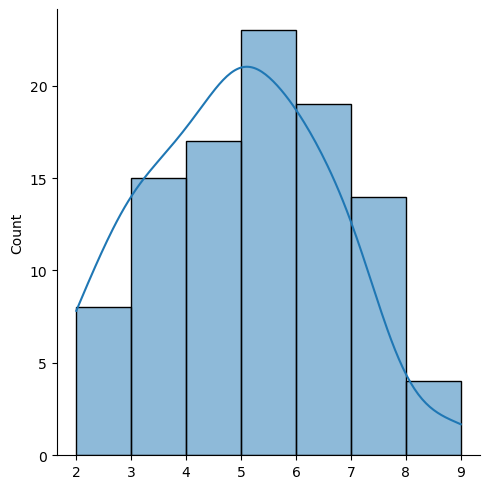

In [65]:
sns.displot(pd.Series(w_queen.cardinalities), bins=range(2,10), kde=True);

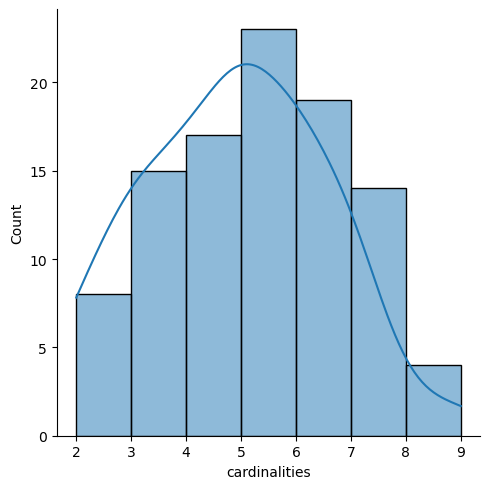

In [66]:
sns.displot(g_queen.cardinalities, bins=range(2,10), kde=True);

### Operations

### Properties and Transformations

### Enhancements

### Incompatibilities

### Future

### Further Reading
- Anselin and Rey
- Dani
- Martin